# Test `earthquake_input_fn.earthquake_input_fn`

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
sess = tf.InteractiveSession()
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

In [2]:
EARTHQUAKE_DATA_DIR = '/workspace/persistent-data/earthquake/tfrecords2'

In [3]:
def reload_tf():
    global lstm_estimator
    global earthquake_input_fn
    for i in range(2):
        import lstm_estimator
        import earthquake_input_fn
        reload(lstm_estimator)
        reload(earthquake_input_fn)
        del lstm_estimator
        del earthquake_input_fn
    import lstm_estimator
    import earthquake_input_fn

In [4]:
reload_tf()

In [5]:
BATCH_SIZE = 24
TIMESTEPS = 4096
N_sub_batches = int(4096 / TIMESTEPS)

In [6]:
dataset = earthquake_input_fn.earthquake_input_fn2(EARTHQUAKE_DATA_DIR, BATCH_SIZE, TIMESTEPS, ['1e0'], 'train', eager=True)

In [7]:
#with tf.Session() as sess:
#    result = sess.run(dataset)
#result[0]['acousticdata'].shape
#result[1].shape

In [12]:
PULL_BATCHES = 1

In [13]:
feats = np.ndarray((PULL_BATCHES * BATCH_SIZE, 4096))
labels = np.ndarray((PULL_BATCHES * BATCH_SIZE, 4096))

for sbi, (dsfeats, dslabels) in enumerate(dataset.take(PULL_BATCHES * N_sub_batches)):
    batch_num = int(sbi / N_sub_batches)
    ts_idx = int(sbi % N_sub_batches)
    feats[BATCH_SIZE * batch_num:BATCH_SIZE * (batch_num + 1),
          ts_idx * TIMESTEPS:(ts_idx+1)*TIMESTEPS] = dsfeats['acousticdata'].numpy().copy()
    labels[BATCH_SIZE * batch_num:BATCH_SIZE * (batch_num + 1),
           ts_idx*TIMESTEPS:(ts_idx+1)*TIMESTEPS] = dslabels.numpy().copy()

In [14]:
feats

array([[ 0.,  3.,  3., ...,  8.,  3., -3.],
       [ 3.,  2.,  7., ...,  2.,  4.,  5.],
       [ 1.,  3.,  5., ..., 10.,  4.,  0.],
       ...,
       [ 4.,  8.,  6., ...,  2., -2.,  0.],
       [ 1., -3.,  0., ...,  6.,  5.,  0.],
       [ 5.,  9.,  6., ...,  3.,  5.,  3.]])

In [15]:
labels

array([[-0.023755  , -0.023755  , -0.023755  , ..., -0.02375493,
        -0.02375493, -0.02375493],
       [-0.04457333, -0.04457333, -0.04457333, ..., -0.04457326,
        -0.04457326, -0.04457326],
       [-0.01122667, -0.01122667, -0.01122667, ..., -0.01122659,
        -0.01122659, -0.01122659],
       ...,
       [-0.02396667, -0.02396667, -0.02396667, ..., -0.02396659,
        -0.02396659, -0.02396659],
       [-0.02233833, -0.02233833, -0.02233833, ..., -0.02233826,
        -0.02233826, -0.02233826],
       [-0.00833833, -0.00833833, -0.00833833, ..., -0.00833826,
        -0.00833826, -0.00833826]])

In [16]:
feats.shape

(24, 4096)

In [17]:
labels.shape

(24, 4096)

(array([4096.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 4096., 4096.,    0.,    0.,    0., 4096.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 4096.,    0.,
           0.,    0., 4096.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 4096.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 8192.,    0.,    0.,    0., 8192.,
           0.,    0.,    0.,    0., 4096., 4096.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 4096., 4096.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 8192.,    0.,    0.,    0.,
           0.,    0., 4096.,    0.,    0., 8192.,    0.,    0., 8192.,
        8192.]),
 array([-4.78690091, -4.7701381 , -4.75337529, -4.73661247, -4.71984966,
        -4.70308684, -4.68632403, -4.66956122, -4.6527984 , -4.63603559,
        -4.61927277, -4.60250996, -4.58574715, -4.568984

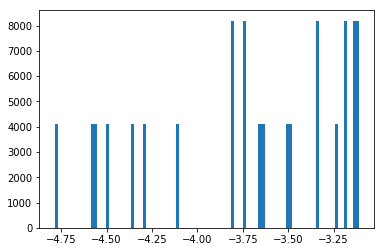

In [18]:
#plt.hist(labels.reshape(-1), bins=100)
plt.hist(np.log(-labels.reshape(-1)), bins=100)

# OK...

* Feature preprocessing: cepstral coefficients?
* How many sub-networks do we need?
* How to decide on scale value (logspace)?
* What is the distribution of scale values?

In [19]:
dataset = earthquake_input_fn.earthquake_input_fn2_prediction(EARTHQUAKE_DATA_DIR,
                                                              BATCH_SIZE,
                                                              TIMESTEPS,
                                                              BATCH_SIZE,
                                                              ['1e0'], 
                                                              'train',
                                                              eager=True)

AttributeError: module 'earthquake_input_fn' has no attribute 'earthquake_input_fn2_prediction'

In [13]:
PULL_BATCHES=1
feats = np.ndarray((PULL_BATCHES * BATCH_SIZE, 4096))
labels = np.ndarray((PULL_BATCHES * BATCH_SIZE, 4096))

for sbi, (dsfeats) in enumerate(dataset.take(PULL_BATCHES * N_sub_batches)):
    batch_num = int(sbi / N_sub_batches)
    ts_idx = int(sbi % N_sub_batches)
    feats[BATCH_SIZE * batch_num:BATCH_SIZE * (batch_num + 1),
          ts_idx * TIMESTEPS:(ts_idx+1)*TIMESTEPS] = dsfeats['acousticdata'].numpy().copy()
    labels[BATCH_SIZE * batch_num:BATCH_SIZE * (batch_num + 1),
           ts_idx*TIMESTEPS:(ts_idx+1)*TIMESTEPS] = dsfeats['tminus'].numpy().copy()

In [14]:
feats

array([[  5.,   2.,   0., ...,   9.,   6.,   4.],
       [  4.,   5.,   9., ...,   7.,   0.,  -2.],
       [ -7., -16.,  -9., ...,  -1.,   3.,   5.],
       ...,
       [  5.,  10.,   8., ...,   9.,   7.,   1.],
       [ -1.,   1.,   3., ...,   5.,   4.,   5.],
       [  6.,   6.,   3., ...,   6.,   6.,   8.]])

In [15]:
labels

array([[-0.5923    , -0.5923    , -0.5923    , ..., -0.5922955 ,
        -0.5922955 , -0.5922955 ],
       [-1.04080001, -1.04080001, -1.0408    , ..., -1.0407955 ,
        -1.0407955 , -1.0407955 ],
       [-1.62339999, -1.62339999, -1.62339999, ..., -1.62339549,
        -1.62339549, -1.62339549],
       ...,
       [-1.24760002, -1.24760002, -1.24760001, ..., -1.24759551,
        -1.24759551, -1.24759551],
       [-2.59779999, -2.59779999, -2.59779999, ..., -2.59779549,
        -2.59779549, -2.59779549],
       [-0.77779999, -0.77779999, -0.77779999, ..., -0.77779549,
        -0.77779549, -0.77779549]])

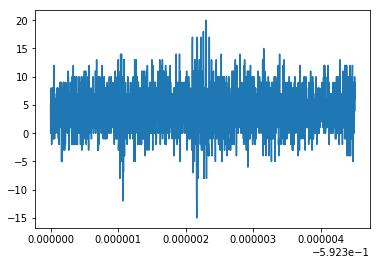

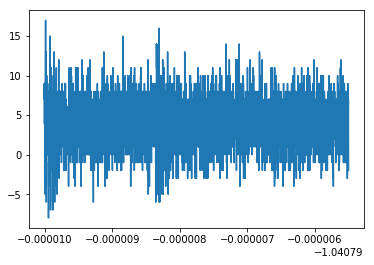

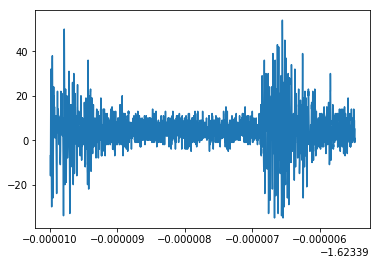

In [16]:
for i in range(3):
    plt.plot(labels[i,:], feats[i,:])
    plt.show()

In [22]:
dataset = earthquake_input_fn.earthquake_input_fn2_64(EARTHQUAKE_DATA_DIR,
                                                      BATCH_SIZE,
                                                      TIMESTEPS,
                                                      ['1e0'], 
                                                      'train',
                                                      eager=True)

TypeError: Expected float64, got <map object at 0x7fd285e0bf60> of type 'map' instead.